In [2]:
import sys
sys.path.append("../")

from DiffusionModules.Diffusion import *
from DiffusionModules.DiffusionTrainer import *
from DiffusionModules.DiffusionModels import *
import os
import torch
import torchvision
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
cifar_path = "/home/archive/cifar10-64"

trainset = torchvision.datasets.ImageFolder(f"{cifar_path}/train")
testset = torchvision.datasets.ImageFolder(f"{cifar_path}/test")

In [5]:
img_target_size=64

timesteps = 1000
timesteps_vals = torch.LongTensor(list(range(0, timesteps, timesteps//10)) + [timesteps-1])

diff_trans = DiffusionImageTransformer(img_target_size=img_target_size)

def plot_figures(images, nrows = 1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind, img in enumerate(images):
        img = img.resize((256,256))
        axeslist.ravel()[ind].imshow(img, cmap=plt.jet())
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

def plot_images(diff_tools, image, timesteps):
    image = [image for _ in timesteps]
    image_data = diff_trans.transform_images(image)
    image_data, noise = diff_tools.noise_images(image_data, timesteps)
    image_back = diff_trans.reverse_transform_images(image_data)
    plot_figures(image_back, 1, len(image_back))

for image, cap in trainset:
    break

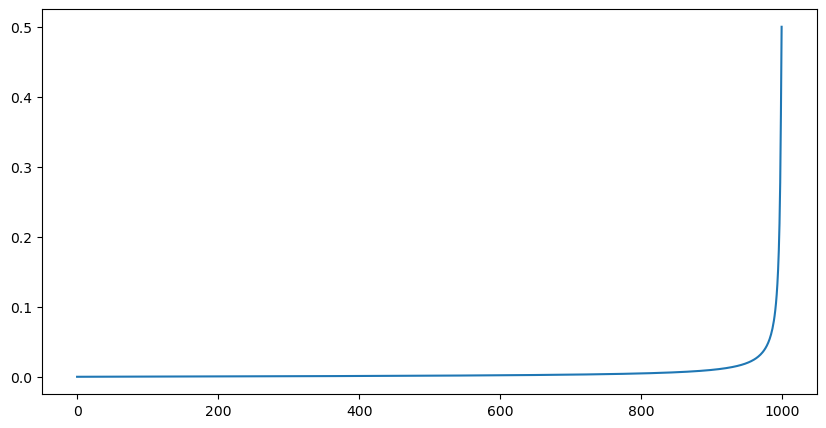

In [6]:
noise_scheduler = CosineScheduler(tau=0.5, offset=0.016)
diff_tools_cos = DiffusionTools(device="cpu", img_size=img_target_size, steps=timesteps, noise_scheduler=noise_scheduler)

plt.clf()
plt.plot(noise_scheduler.get_noise_schedule(1000).numpy())

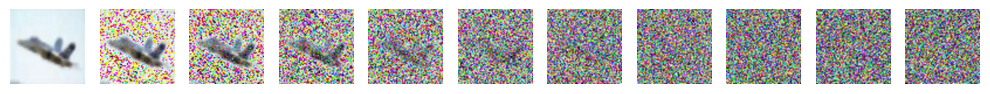

In [11]:
plot_images(diff_tools_cos, image, timesteps_vals)

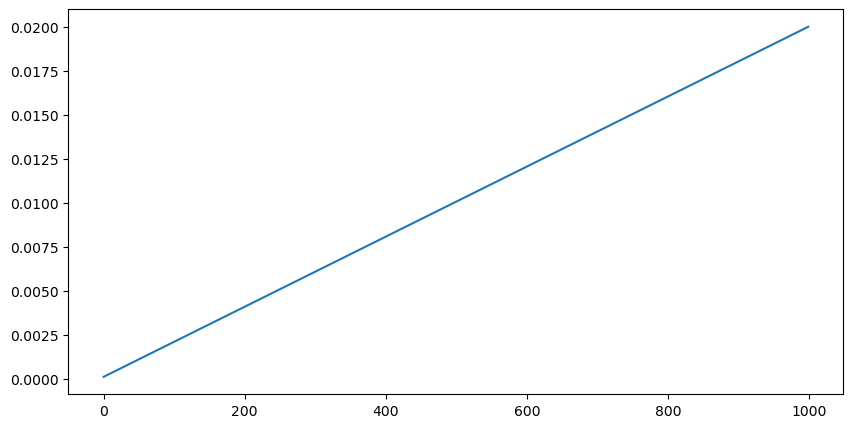

In [6]:
noise_scheduler = LinearScheduler()
diff_tools_lin = DiffusionTools(device="cpu", img_size=img_target_size, steps=timesteps, noise_scheduler=noise_scheduler)

plt.clf()
plt.plot(noise_scheduler.get_noise_schedule(1000).numpy())

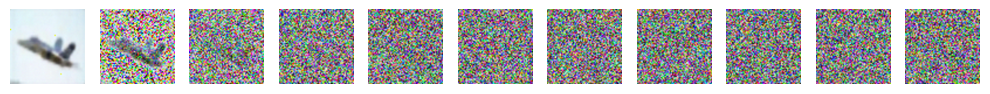

In [7]:
plot_images(diff_tools_lin, image, timesteps_vals)

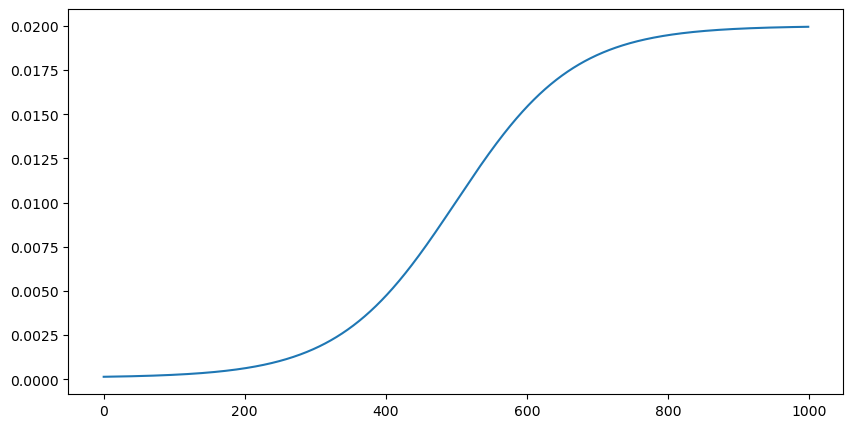

In [8]:
noise_scheduler = SigmoidScheduler()
diff_tools_sig = DiffusionTools(device="cpu", img_size=img_target_size, steps=timesteps, noise_scheduler=noise_scheduler)

plt.clf()
plt.plot(noise_scheduler.get_noise_schedule(1000).numpy())

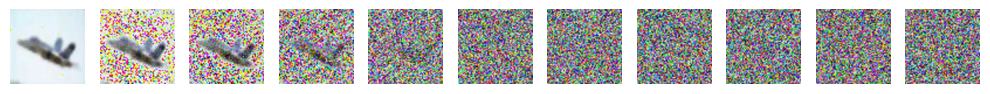

In [9]:
plot_images(diff_tools_sig, image, timesteps_vals)